- https://medium.com/word-wave/fine-tuning-yolov8-with-custom-datasets-from-setup-to-success-d45551ad85aa
- https://github.com/OliLov/python-projects/blob/main/notebooks/blood_count_yolo.ipynb

In [1]:
# !pip install ultralytics

In [2]:
# # get data
# !curl -L "https://github.com/OliLov/Complete-Blood-Cell-Count-Dataset-Formats/archive/refs/heads/master.zip" -o _data/master.zip
# !unzip -q _data/master.zip -d _data/
# !mv "_data/Complete-Blood-Cell-Count-Dataset-Formats-master/YOLO" "datasets/Complete-Blood-Cell-Count-Dataset-Formats-master/"
# !rm -rf "_data/Complete-Blood-Cell-Count-Dataset-Formats-master"

In [12]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# fix for Jupyter notebook
%matplotlib inline

In [4]:
# Plot results image
def printYOLO(results):
    # Initialize a figure for plotting
    plt.figure(figsize=(10, 10))

    # Process results list
    for i, result in enumerate(results):
        # assuming plot() method returns a numpy array in BGR format
        bgr_array = result.plot()

        # Convert BGR to RGB
        rgb_array = bgr_array[:, :, ::-1]

        # Convert numpy array to PIL Image
        img = Image.fromarray(rgb_array)

        # Add a subplot for each image
        ax = plt.subplot(len(results), 1, i + 1)
        ax.imshow(img)
        ax.axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()

- https://docs.ultralytics.com/tasks/detect/#models

In [5]:
model = YOLO("yolov8n.pt")

In [6]:
# Train the model
results = model.train(data="_data/Complete-Blood-Cell-Count-Dataset-Formats-config/yolo.yaml", epochs=3)

Ultralytics YOLOv8.1.5 🚀 Python-3.10.6 torch-2.2.2+cu121 CPU (Intel Core(TM) i7-8565U 1.80GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=_data/Complete-Blood-Cell-Count-Dataset-Formats-config/yolo.yaml, epochs=3, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

train: Scanning /mnt/c/Users/hl2/work_doc/code/git/CookbookPyCode/image_processing/datasets/Complete-Blood-Cell-Count-Dataset-Formats-master/Training.cache... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]
val: Scanning /mnt/c/Users/hl2/work_doc/code/git/CookbookPyCode/image_processing/datasets/Complete-Blood-Cell-Count-Dataset-Formats-master/Validation.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]


Plotting labels to runs/detect/train15/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train15
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.483      2.965      1.489        227        640: 100%|██████████| 19/19 [02:10<00:00,  6.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.83s/it]

                   all         60        812     0.0423      0.639      0.311      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      1.292      1.582      1.293        252        640: 100%|██████████| 19/19 [01:57<00:00,  6.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.36s/it]

                   all         60        812      0.898      0.269      0.527      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G       1.25      1.307      1.286        288        640: 100%|██████████| 19/19 [01:50<00:00,  5.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.64s/it]

                   all         60        812      0.822      0.674      0.831       0.55



3 epochs completed in 0.110 hours.
Optimizer stripped from runs/detect/train15/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train15/weights/best.pt, 6.2MB

Validating runs/detect/train15/weights/best.pt...
Ultralytics YOLOv8.1.5 🚀 Python-3.10.6 torch-2.2.2+cu121 CPU (Intel Core(TM) i7-8565U 1.80GHz)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.22s/it]


                   all         60        812      0.823      0.674      0.831       0.55
                   RBC         60        700       0.54      0.899      0.758        0.5
                   WBC         60         63      0.928      0.921       0.97      0.761
             Platelets         60         49          1      0.203      0.765      0.388
Speed: 1.1ms preprocess, 73.3ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to runs/detect/train15


In [7]:
# validation = model.val()

## Plot

In [8]:
view_images = [
    'datasets/Complete-Blood-Cell-Count-Dataset-Formats-master/Validation/BloodImage_00002.jpg',
    'datasets/Complete-Blood-Cell-Count-Dataset-Formats-master/Validation/BloodImage_00019.jpg'
]
predictions = model.predict(view_images)


0: 480x640 15 RBCs, 1 WBC, 1: 480x640 11 RBCs, 1 WBC, 128.7ms
Speed: 1.8ms preprocess, 64.3ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


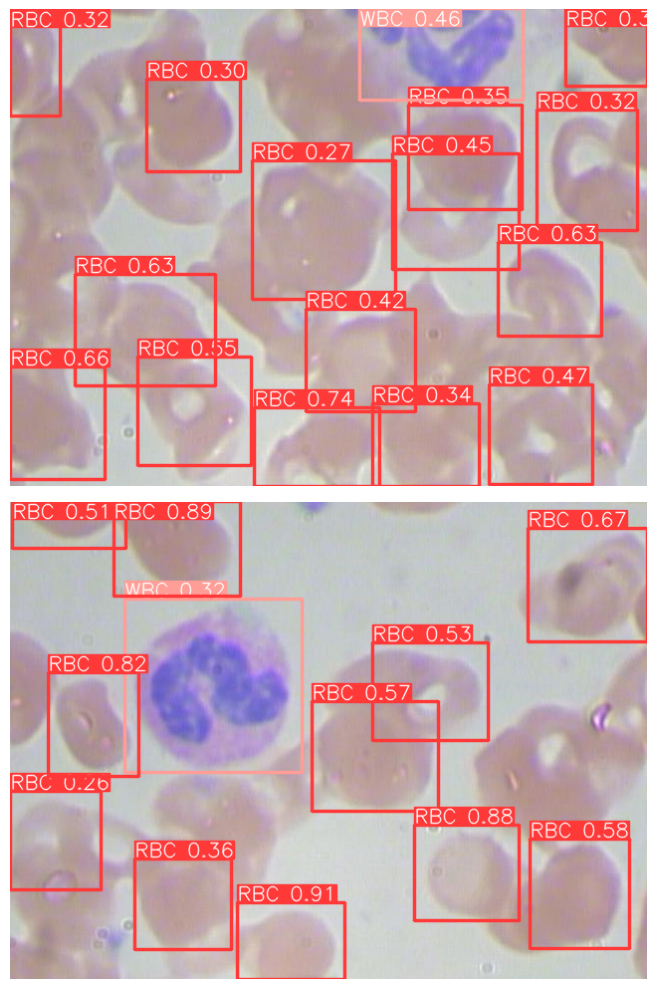

In [9]:
printYOLO(predictions)